# 1ère NSI - Python avancé #1

## 1) Références et Valeurs


### a) Cas des types simples : tout va bien !

In [25]:
a = 5
b = a
print("a=", a, "\tb=", b)

a= 5 	b= 5


**a et b ont la même valeur**.

In [26]:
b += 4
print("a =", a, "\tb =", b)

a = 5 	b = 9


Si on **change la valeur de b, a reste inchangé**. Évidemment me direz-vous !

### b) Cas des Listes : ⚠️ Danger ! ⚠️

Réalisons le même code avec des **listes**

In [27]:
liste1 = [1, 2, 3]
liste2 = liste1
print("liste1 =", liste1, "\tliste2 =", liste2)

liste1 = [1, 2, 3] 	liste2 = [1, 2, 3]


**liste1 et liste2 ont la même valeur**. Mais **modifions liste2** ???

In [28]:
liste2 += [4]
print("liste1 =", liste1, "\tliste2 =", liste2)

liste1 = [1, 2, 3, 4] 	liste2 = [1, 2, 3, 4]


⚠️ **Si on modifie liste2, liste1 est modifiée aussi !** ⚠️ Que s'est-il passé ???

Pour comprendre, écrivons une fonction qui retourne ***l'adresse*** ou la **référence** de la variable en mémoire :

In [29]:
def adr(variable):
    return hex(id(variable))

Regardons les **adresses** de liste1 et liste2 :

In [30]:
print("Adresse de liste1:",adr(liste1))
print("Adresse de liste2:",adr(liste2))

Adresse de liste1: 0x7fbb4c858aa0
Adresse de liste2: 0x7fbb4c858aa0


Les deux variables liste1 et liste2 **pointent vers la même adresse en mémoire** : leur contenu est donc toujours **identique**. En effet, si je modifie l'une, je modifie l'autre puisqu'elles **pointent sur le même contenu en mémoire**.
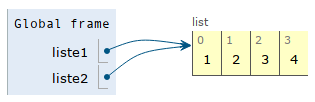
Python **ne recopie pas le contenu de liste1 dans liste2**, il se contente de **faire pointer la variable liste2 sur l'emplacement mémoire de liste1**.

Si on souhaite **recopier** liste1 dans liste2 et que les 2 variables **restent indépendantes** avec des **adresses différentes**, il faut indiquer **explicitement la copie**, par exemple comme ceci :

In [31]:
liste1 = [1, 2, 3]
liste2 = liste1.copy()
print("liste1 =", liste1, "\tliste2 =", liste2)
print("Adresse de liste1:", adr(liste1))
print("Adresse de liste2:", adr(liste2))

liste1 = [1, 2, 3] 	liste2 = [1, 2, 3]
Adresse de liste1: 0x7fbb4d0f1730
Adresse de liste2: 0x7fbb4c84f3c0


Cette fois on a bien **2 variables différentes** :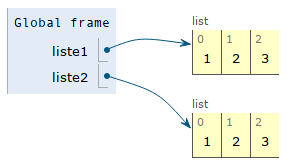

In [32]:
liste2 += [4]
print("liste1 =", liste1, "\tliste2 =", liste2)

liste1 = [1, 2, 3] 	liste2 = [1, 2, 3, 4]


Cette fois les deux variables sont bien **distinctes** et occupent **2 places en mémoire différentes**. Elles sont donc **indépendantes**.
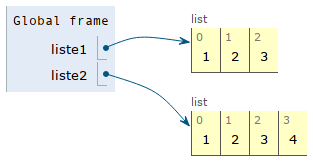

##  2) Variables Immuables (*immutable*) et Muables (*mutable*)

### a) Immuables

Les variables de type `int, float, bool, str` sont **immuables** c'est-à-dire **pas modifiables** !

C'est évidemment **étrange** car vous avez bien modifié le contenu de certaines variables de type `int` dans vos programmes...

Une variable **immuable ne peut pas changer le contenu de son emplacement en mémoire**. Donc, quand on souhaite modifier une variable **immuable**, par exemple si on écrit `a += 4`, Python **crée une nouvelle variable avec le même nom ailleurs en mémoire**.

Vérifions cela :

In [33]:
a = 5
print("Valeur de a:", a, "\t\tAdresse de la variable a: ", adr(a))
a += 4
print("Valeur de a:", a, "\t\tAdresse de la variable a: ", adr(a))

Valeur de a: 5 		Adresse de la variable a:  0x7fbb538da460
Valeur de a: 9 		Adresse de la variable a:  0x7fbb538da4e0


La variable a est bien **modifiée, mais ce n'est pas la même**, c'est une **nouvelle** variable a !

À chaque fois que Python **modifie la valeur d'une variable immuable, il en crée une nouvelle copie ! C'est inefficace** mais apporte **plus de sécurité** car cela évite de modifier des variables sans le vouloir.

### b) Muables

Les variables de type `list, set, dict` sont **muables** c'est-à-dire qu'elles sont **modifiables sans changer d'adresse en mémoire**.

Une variable **muable peut changer de contenu en gardant la même adresse en mémoire**.

Vérifions cela aussi :

In [34]:
liste = [1, 2, 3]
print("Valeur de liste:", liste, "\t\tAdresse de la variable liste: ", adr(liste))
liste += [4]
print("Valeur de liste:", liste, "\t\tAdresse de la variable liste: ", adr(liste))

Valeur de liste: [1, 2, 3] 		Adresse de la variable liste:  0x7fbb4c84f1e0
Valeur de liste: [1, 2, 3, 4] 		Adresse de la variable liste:  0x7fbb4c84f1e0


La variable liste est **muable** elle est donc bien **modifiée** directement, **en gardant la même référence en mémoire** !

Les variables **muables** engendrent parfois des **bugs car elles peuvent être modifiées par erreur de programmation**. Par contre cette gestion est **plus efficace** car on ne **recopie pas la variable à chaque modification**.

## 3) Paramètres des fonctions et ⚠️ effet de bord ⚠️

Il existe le même problème quand on donne des arguments (ou paramètres) aux fonctions :

- Pour les variables de type `int, float, bool, str`, il n'y a **pas d'effet de bord** car ces types sont **immuables**. La **variable indiquée en paramètre est recopiée ailleurs en mémoire dès quelle est modifiée**.

- Pour les variables de type `list, set, dict`, il y a des **effets de bord** car ces types sont **muables**. La **fonction** reçoit **l'adresse de la variable donnée en argument** et **peut** donc en **modifier le contenu** car la variable est **muable**.

**Effet de bord** : quand une fonction modifie le contenu d'une variable qui appartient au contexte appelant.

Illustrons cela avec 2 exemples. Nous créons une fonction **test** qui va ajouter 4 à la variable donnée en argument.

### a) Variable immuable en argument : Pas d'effet de bord !

In [35]:
def test(variable):
    print("Adresse de la variable donnée en argument: ", adr(variable))
    variable += 4
    print("Adresse de la variable une fois modifiée: ", adr(variable))

a = 5
print("Adresse de la variable a: ", adr(a))
test(a)
print("Valeur de a après l'exécution de la fonction :",a)

Adresse de la variable a:  0x7fbb538da460
Adresse de la variable donnée en argument:  0x7fbb538da460
Adresse de la variable une fois modifiée:  0x7fbb538da4e0
Valeur de a après l'exécution de la fonction : 5


⚠️ La fonction test reçoit **l'adresse de la variable a** mais quand elle veut **modifier** la variable, il s'en **crée une copie à une autre adresse** : la variable **a n'est donc pas modifiée** ! **Ici, pas d'effet de bord !**

### b) Variable muable en argument : ⚠️ Effet de bord ! ⚠️

In [36]:
def test(variable):
    print("Adresse de la variable donnée en argument: ", adr(variable))
    variable.append(4)
    print("Adresse de la variable une fois modifiée: ", adr(variable))

liste = [1,2,3]
print("Adresse de la variable liste: ", adr(liste))
test(liste)
print("Valeur de liste après l'exécution de la fonction :",liste)

Adresse de la variable liste:  0x7fbb4d0f2320
Adresse de la variable donnée en argument:  0x7fbb4d0f2320
Adresse de la variable une fois modifiée:  0x7fbb4d0f2320
Valeur de liste après l'exécution de la fonction : [1, 2, 3, 4]


⚠️ La fonction test reçoit **l'adresse de la variable liste** et peut **modifier** la variable car elle est **muable** ! **Ici il y'a effet de bord !** ⚠️